In [1]:
from builder import Builder, Process
from core_processes import process_registry

In [2]:
b = Builder(process_registry=process_registry)

In [3]:
b.process_registry_list()

['ram-emitter',
 'console-emitter',
 'smoldyn_process',
 'cobra',
 'database-emitter',
 'copasi',
 'tellurium_process',
 'tellurium_step']

In [4]:
# b['fba'].add_process(name='cobra')

In [5]:
# b['smoldyn'].add_process(name='smoldyn_process')

In [6]:
class Toy(Process):
    config_schema = {
        'A': 'float',
        'B': 'float',
    }

    def __init__(self, config):
        super().__init__(config)

    def schema(self):
        return {
            'inputs': {
                'A': 'float',
                'B': 'float'},
            'outputs': {
                'C': 'float'}
        }

    def update(self, state, interval):
        update = {
            'C': state['A'] + state['B']
        }
        return update

b.register_process('toy', Toy)

In [7]:
b.process_registry_list()

['ram-emitter',
 'console-emitter',
 'smoldyn_process',
 'cobra',
 'database-emitter',
 'copasi',
 'toy',
 'tellurium_process',
 'tellurium_step']

In [8]:
b['toy'].add_process(name='toy')

In [9]:
b['toy'].ports()

{'_inputs': {'A': 'float', 'B': 'float'}, '_outputs': {'C': 'float'}}

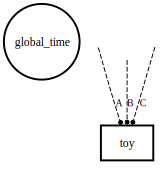

In [10]:
b.plot()

In [11]:
b['toy'].connect(port='A', target='A_store')
# b['toy'].connect(port='B', target='B_store')  # TODO -- compile is trying to connect A at the wrong level??
# b['toy'].connect(port='C', target='C_store')

KeyError: 'A_stor'

In [ ]:
b.plot()

In [ ]:
b.document()

In [ ]:
b.write(filename='toy_bigraph')